label
FTP            10806
GAMES              6
INTERACTIVE       87
MAIL           23883
MULTIMEDIA      3026
P2P             2997
WWW            74582
dtype: int64
(115387L, 237L)
Feature ranking:
1. feature 25 (0.055202)
2. feature 168 (0.052311)
3. feature 0 (0.048256)
4. feature 75 (0.026981)
5. feature 154 (0.024560)
6. feature 28 (0.024200)
7. feature 71 (0.023377)
8. feature 72 (0.020781)
9. feature 180 (0.019593)
10. feature 146 (0.017288)
11. feature 148 (0.015937)
12. feature 233 (0.015422)
13. feature 181 (0.015389)
14. feature 172 (0.015005)
15. feature 159 (0.014768)
16. feature 143 (0.014595)
17. feature 175 (0.014253)
18. feature 149 (0.014010)
19. feature 87 (0.013274)
20. feature 74 (0.012661)
21. feature 173 (0.011735)
22. feature 209 (0.011158)
23. feature 178 (0.011021)
24. feature 213 (0.010997)
25. feature 59 (0.010576)
26. feature 45 (0.010459)
27. feature 152 (0.010397)
28. feature 169 (0.010268)
29. feature 14 (0.009809)
30. feature 176 (0.009594)
31. feature 

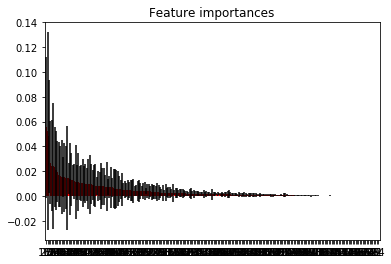

(115387L, 20L)
sklearn.cross_validation.StratifiedKFold(labels=[u'WWW' u'WWW' u'WWW' ..., u'MAIL' u'MAIL' u'MAIL'], n_folds=10, shuffle=True, random_state=None)
Native Network:            0.99
混淆矩阵为 = 
[[    0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0    11    12     0     0     0    40]
 [    0     0     0     0     0     1 23724     1     2     0   144]
 [    0     0     0     0     0     0     6  2893    20     0     8]
 [    0     0     0     0     0     0     3    46  2555     0   296]
 [    0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     9   127    78    29     0 74251]]


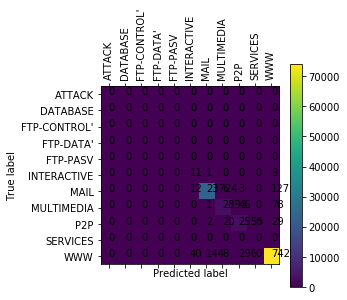

----------------
分类报告: 
               precision    recall  f1-score   support

        FTP       0.97      0.95      0.96     10806
      GAMES       0.00      0.00      0.00         6
INTERACTIVE       0.52      0.13      0.20        87
       MAIL       0.99      0.99      0.99     23883
 MULTIMEDIA       0.89      0.96      0.92      3026
        P2P       0.95      0.85      0.90      2997
        WWW       0.99      1.00      0.99     74582

avg / total       0.99      0.99      0.99    115387

finish
运行时间 = 170.00 s


In [7]:
'''
moore数据集的10份中  综合每个类别样本数据 交叉验证 做仿真实验
'''
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import csv
import datetime
starttime = datetime.datetime.now()

# read CSV file directly from a URL and save the results
# NOT: First extract zip file
data = pd.read_csv('entry_merge.csv',   quoting=csv.QUOTE_NONE, encoding='utf-8')

#families whose count is greater than 30 
#class_group = df.groupby("class")

print(data.groupby('label').size())

# extact features and labels
# X feature set, y labels
X = data.loc[:,data.columns[:-1]] # -1 label kolonunu refer ediyor
y = data.label
X = X.values

print(X.shape)
# print X
# print '----------------------------------------------'

# Generally, this is one of the most commonly used preprocessing step.特征值预处理
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
#数据归一化 和 标准化
# normalize the data attributes  实验发现效果不理想 因此不做归一化
# normalized_X = preprocessing.normalize(X)
# standardize the data attributes 数据标准化 效果拔群
# standardized_X = preprocessing.scale(X)
# X = standardized_X

#下面的树算法(Tree algorithms)计算特征的信息量：
def tree_based_feature_selection(X,y):
    forest = ExtraTreesClassifier()
    forest = forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

    #print(clf.feature_importances_)  
    #model = SelectFromModel(forest, prefit=True) 
    # 选择特征值分数靠前的 ，并且得分大于 threshold=0.012的，阙值的确定主要看阙值得分图
    model = SelectFromModel(forest, prefit=True, threshold=0.012) 
    X_new = model.transform(X)
    return X_new
X=tree_based_feature_selection(X,y)
print(X.shape)
# print X

from sklearn import linear_model, ensemble, svm, tree, neural_network, metrics, naive_bayes
from sklearn import cross_validation

#训练
def train_flow_classification(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
#     stratified_k_fold = cross_validation.StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
#     y_pred = y.copy()
#     print stratified_k_fold
    clf = clf_class(**kwargs)
    clf.fit(X,y)
#     for ii, jj in stratified_k_fold:
#         X_train, X_test = X[ii], X[jj]
#         y_train = y[ii]
#         #这里的 clf应该放在 for循环的外面，不然 分类器每次for循环都重新训练了
# #         clf = clf_class(**kwargs)
#         clf.fit(X_train,y_train)
    return clf

#预测验证
def pred_flow_classification(X, y, clf, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = cross_validation.StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    clf_train = clf
    print stratified_k_fold
#     print y_pred
    for ii, jj in stratified_k_fold:
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        y_pred[jj] = clf_train.predict(X_test)
#         print 'y_pred    ',y_pred[jj]
    return y_pred

# cross validation of the ML algorithms
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = cross_validation.StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    print stratified_k_fold
    #建议 clf = clf_class(**kwargs) 放在 for循环外面
#     print y_pred
    # ii+jj 的长度是样本总数，而 ii 表示用于训练的样本的序号集合，jj表示用于测试/预测的样本的序号集合
    for ii, jj in stratified_k_fold:
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        #这里的 clf应该放在 for循环的里面，每次for循环分类器都用于重新训练，因为用到了交叉验证，它划分了10份样本，每次拿其中一份做预测样本
        #其余九份做训练，以此来对预测的那一份样本做预测和比较，经过10次for循环所有的10份样本都会被用来交叉验证，最终预测的样本总数等于原样本
        #这样的好处是没有拿所有样本做训练集，而是每次只取其中九份做训练，留一份做预测，一是防止过拟合二是增加实验可信度
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
#         print 'y_pred    ',y_pred[jj]
    return y_pred

def draw_confusion_matrix(flow_confusion_matrix,flow_labels):
#     plt.figure(figsize=(120,120), dpi=720)
    plt.matshow(flow_confusion_matrix) #画混淆矩阵图，配色风格使用cm.Greens，更多风格请参考官网。
    plt.colorbar() #颜色标签
    xlocations = np.array(range(len(flow_labels))) 
    for x in range(len(flow_confusion_matrix)): #数据标签
        for y in range(len(flow_confusion_matrix)):
#             plt.annotate(flow_confusion_matrix[x,y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
            plt.annotate(flow_confusion_matrix[x,y], xy=(x, y))
    plt.xticks(xlocations, flow_labels, rotation=90)  
    plt.yticks(xlocations, flow_labels)        
    plt.ylabel('True label') #坐标轴标签
    plt.xlabel('Predicted label') #坐标轴标签
    plt.show()

# print accuracies of the ML algo 其他机器学习算法的 分类准确率分数 比较，分类准确率分数是指所有分类正确的百分比
# print('Random Forest Classifier:       {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
# print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svm.SVC))))
# print('Logistic Regression:            {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression))))
# print('Native Network:            {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, neural_network.MLPClassifier, activation ='relu',
#                                                                                         hidden_layer_sizes =(30,30,30,30,30,30,30,30,30)))))
#所有样本做训练集
# clf_train = train_flow_classification(X, y, neural_network.MLPClassifier, activation ='relu',hidden_layer_sizes =(30,30,30,30,30,30,30,30,30))
#预测得到的样本 y_pred
# y_pred = pred_flow_classification(X, y,clf_train)
#分类准确率分数
#交叉验证方式 做训练集 预测得到的样本y_pred
y_pred = stratified_cv(X, y, neural_network.MLPClassifier, activation ='relu',hidden_layer_sizes =(30,30,30,30,30,30,30,30,30),
                      alpha = 0.001)
print('Native Network:            {:.2f}'.format(metrics.accuracy_score(y, y_pred)))

#混淆(xiao)矩阵
flow_labels = ["ATTACK","DATABASE","FTP-CONTROL'","FTP-DATA'","FTP-PASV","INTERACTIVE",
                                                                 "MAIL","MULTIMEDIA","P2P","SERVICES","WWW"]
flow_confusion_matrix = metrics.confusion_matrix(y, y_pred, labels = flow_labels)
print '混淆矩阵为 = \n',flow_confusion_matrix
draw_confusion_matrix(flow_confusion_matrix, flow_labels)
print '----------------'
print '分类报告: \n ',metrics.classification_report(y, y_pred)
print 'finish'
#long running
endtime = datetime.datetime.now()
print ('运行时间 = %.2f s' % (endtime - starttime).seconds)